In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
os.getcwd()

'/home/vizziwo/capcookie/models'

## Loading Data

In [22]:
X_train = pd.read_csv('../data/processed/X2_train.csv', index_col=0)
X_test = pd.read_csv('../data/processed/X2_test.csv', index_col=0)
y_train = pd.read_csv('../data/processed/y2_train.csv', index_col=0)
y_test = pd.read_csv('../data/processed/y2_test.csv', index_col=0)

In [23]:
X_train.head()

,signs_of_mental_illness,body_camera,gender_F,gender_M,threat_level_attack,threat_level_not_attack,threat_level_unspecified,flee_Car,flee_Foot,flee_Not fleeing,...,armed_knife,armed_machete,armed_other,armed_sword,armed_toy weapon,armed_unarmed,armed_undetermined,armed_unknown weapon,armed_vehicle,standardized_age
2836,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.740107
1157,1,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.504791
744,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0.269475
1448,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0.583230
3339,0,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,-0.907106


## Dummy Classifier

##### Since my data is imbalanced, I want to make sure my models perform at least as well as a model that always guessing the largest class.

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, plot_confusion_matrix, f1_score, recall_score
from sklearn.model_selection import cross_val_score


dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train, y_train)


DummyClassifier(random_state=42, strategy='stratified')

F1: 0.4579185520361991
ROC-AUC: 0.5063987324004492
Accuracy: 0.5110204081632653


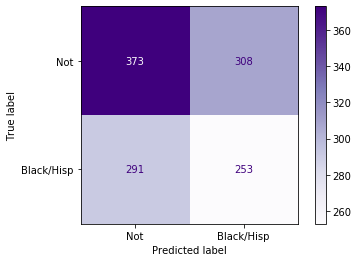

In [25]:
y_predict_dummy = dummy.predict(X_test)
predprob = dummy.predict_proba(X_test)[:,1]

f1_dum = f1_score(y_test, y_predict_dummy)
recall_dum = recall_score(y_test, y_predict_dummy)
auc_dum = roc_auc_score(y_test, dummy.predict_proba(X_test)[:,1])
cv_scores_dum_train = cross_val_score(dummy, X_train, y_train).mean()

print('F1:', f1_dum)
print('ROC-AUC:', auc_dum)
print('Accuracy:', dummy.score(X_test, y_test))
plot_confusion_matrix(dummy, X_test,y_test,display_labels=['Not','Black/Hisp'], cmap="Purples")


Since I'm interested mostly in how many 'True' were predicted 'True,' the F1 Score seems especially useful for me. I may also want to look at 'Recall' to judge a model by its false negatives.
The dummy model has a relatively high ROC-AUC score for a dummy model, so I won't use this to judge.

# SVM, out of the box

Mean CV F1 training score: 0.6382781211018702
Accuracy: 0.6702040816326531
F1 Score: 0.637342908438061


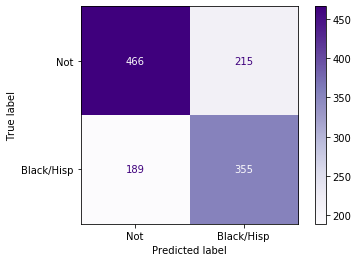

In [26]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
Accuracy_svm=svm.score(X_test,y_test)
f1_svm = f1_score(y_test, y_predict_svm)
recall_svm = recall_score(y_test, y_predict_svm)
auc_svm = roc_auc_score(y_test, svm.predict_proba(X_test)[:,1])

cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='f1')
cv_scores_svm_train= cv_scores_train.mean()
print ('Mean CV F1 training score: ' +str(cv_scores_svm_train))
print('Accuracy:', Accuracy_svm)
print('F1 Score:', f1_svm)
plot_confusion_matrix(svm, X_test, y_test,cmap="Purples", display_labels=['Not','Black/Hisp'])

## RANDOM FOREST, out of the box

Mean CV training F1 score: 0.5896889554621049
Accuracy: 0.6334693877551021
F1 Score: 0.5686839577329491


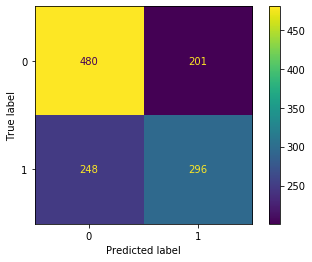

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Apply RF to the training data:

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='gini')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
plot_confusion_matrix(rf, X_test, y_test)
predprob = rf.predict_proba(X_test)[:,1]
Accuracy_rf=rf.score(X_test,y_test)
f1_rf = f1_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
auc_rf = roc_auc_score(y_test, predprob)

cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='f1')
cv_scores_rf_train= cv_scores_train.mean()
print ('Mean CV training F1 score: ' +str(cv_scores_rf_train))

print('Accuracy:', Accuracy_rf)
print('F1 Score:', f1_score(y_test, y_predict_rf))


## GRADIENT BOOST, out of the box

Mean CV F1 Training Score: 0.6142686605261505
Accuracy: 0.6424489795918368
F1 Score: 0.5989010989010989


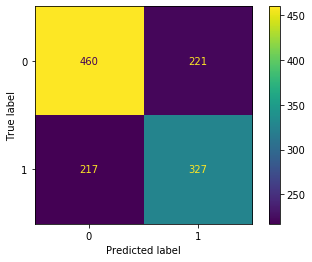

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
plot_confusion_matrix(gbc, X_test, y_test)
predprob = gbc.predict_proba(X_test)[:,1]
Accuracy_gbc=gbc.score(X_test,y_test)
f1_gbc = f1_score(y_test, y_predict_gbc)
recall_gbc = recall_score(y_test, y_predict_gbc)
auc_gbc = roc_auc_score(y_test, predprob)

cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='f1')
cv_scores_gbc_train= cv_scores_train.mean()
print ('Mean CV F1 Training Score: ' +str(cv_scores_gbc_train))

print('Accuracy:', Accuracy_gbc)
print('F1 Score:', f1_score(y_test, y_predict_gbc))

## LOGISTIC REGRESSION

Mean CV F1 Training Score: 0.6333470101378179
Accuracy: 0.6751020408163265
F1 Score: 0.6375227686703097


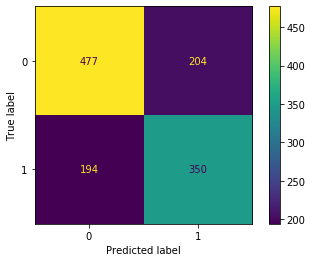

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_predict_lr)
plot_confusion_matrix(lr, X_test, y_test)

predprob = lr.predict_proba(X_test)[:,1]
Accuracy_lr=lr.score(X_test,y_test)
f1_lr = f1_score(y_test, y_predict_lr)
recall_lr = recall_score(y_test, y_predict_lr)
auc_lr = roc_auc_score(y_test, predprob)

cv_scores_train= cross_val_score(lr,X_train,y_train,cv=5,scoring='f1')
cv_scores_lr_train= cv_scores_train.mean()

print ('Mean CV F1 Training Score: ' +str(cv_scores_lr_train))


print('Accuracy:', Accuracy_lr)
print('F1 Score:', f1_score(y_test, y_predict_lr))


In [30]:
models = ['dummy', 'svm', 'rf', 'gbc', 'lr']
auc = [auc_dum, auc_svm, auc_rf, auc_gbc, auc_lr]
recall = [recall_dum, recall_svm, recall_rf, recall_gbc, recall_lr]
cv_f1_train = [cv_scores_dum_train, cv_scores_svm_train, cv_scores_rf_train, cv_scores_gbc_train, cv_scores_lr_train]
f1_scores = [f1_dum, f1_svm, f1_rf, f1_gbc, f1_lr]
df = pd.DataFrame(list(zip(models, auc, recall, cv_f1_train, f1_scores)),
                 columns = ['Model', 'AUC Score', 'Recall Score', 'CV F1 Scores: Train', 'F1 Scores'])
df

,Model,AUC Score,Recall Score,CV F1 Scores: Train,F1 Scores
0,dummy,0.506399,0.465074,0.507341,0.457919
1,svm,0.712771,0.652574,0.638278,0.637343
2,rf,0.673472,0.544118,0.589689,0.568684
3,gbc,0.691266,0.601103,0.614269,0.598901
4,lr,0.712223,0.643382,0.633347,0.637523


The highest performing models were SVM and Logistic Regression.

# Logistic Regression: Hyperparameter Tuning

In [283]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.639970 using {'C': 100, 'penalty': 'none', 'solver': 'newton-cg'}


In [284]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

scores=[]
parameters=[]

for mean, stdev, param in zip(means, stds, params):
    scores.append(mean)
    parameters.append(param)
    
scores= np.array(scores)
params=np.array(params)

ps = params[scores.argsort()[-10:]]
ss = scores[scores.argsort()[-10:]]

for p, s in zip(ps, ss):
    print(s, ':', p)

0.6399695230924827 : {'C': 1.0, 'penalty': 'none', 'solver': 'newton-cg'}
0.6399695230924827 : {'C': 10, 'penalty': 'none', 'solver': 'newton-cg'}
0.6399695230924827 : {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.6399695230924827 : {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6399695230924827 : {'C': 0.1, 'penalty': 'none', 'solver': 'newton-cg'}
nan : {'C': 0.1, 'penalty': 'none', 'solver': 'liblinear'}
nan : {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
nan : {'C': 0.01, 'penalty': 'none', 'solver': 'liblinear'}
nan : {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
nan : {'C': 1.0, 'penalty': 'none', 'solver': 'liblinear'}


F1 Score: 0.6342342342342343


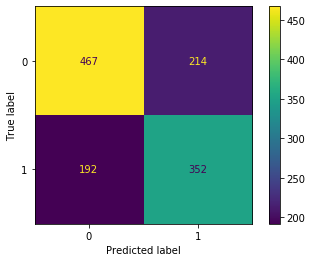

In [32]:
lr = LogisticRegression(C=100, penalty='none', solver='newton-cg', random_state=2)
lr.fit(X_train, y_train)
y_predict_lr_tune = lr.predict(X_test)
f1_tuned = f1_score(y_test, y_predict_lr_tune)
plot_confusion_matrix(lr, X_test, y_test)
print('F1 Score:', f1_tuned)


#### Not as good as out of the box.

### Oversampling to Increase Occurences of Less Represented Class (the positive class)

In [33]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.values)

### Grid Search with Resampled Data

In [287]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['none', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train_res, y_train_res)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.671115 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [288]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

scores=[]
parameters=[]

for mean, stdev, param in zip(means, stds, params):
    scores.append(mean)
    parameters.append(param)
    
scores= np.array(scores)
params=np.array(params)

ps = params[scores.argsort()[-10:]]
ss = scores[scores.argsort()[-10:]]

for p, s in zip(ps, ss):
    print(s, ':', p)

0.6578439779810737 : {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6582672465158532 : {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.6679779993179119 : {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.6681409985029161 : {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.6711146033245029 : {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
nan : {'C': 0.1, 'penalty': 'none', 'solver': 'liblinear'}
nan : {'C': 10, 'penalty': 'none', 'solver': 'liblinear'}
nan : {'C': 100, 'penalty': 'none', 'solver': 'liblinear'}
nan : {'C': 0.01, 'penalty': 'none', 'solver': 'liblinear'}
nan : {'C': 1.0, 'penalty': 'none', 'solver': 'liblinear'}


### Using best GridSearch hyperparameters to model my test data

CV_training_f1: 0.6711146033245029
F1 Test Score: 0.6451612903225806


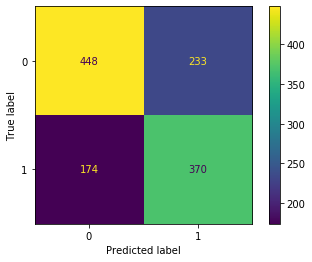

In [34]:
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
lr.fit(X_train_res, y_train_res)
y_predict_lr_resampled = lr.predict(X_test)
cv_scores_train= cross_val_score(lr,X_train_res,y_train_res,cv=5,scoring='f1')
print('CV_training_f1:', cv_scores_train.mean())
f1_resampled = f1_score(y_test, y_predict_lr_resampled)
plot_confusion_matrix(lr, X_test, y_test)
print('F1 Test Score:', f1_resampled)

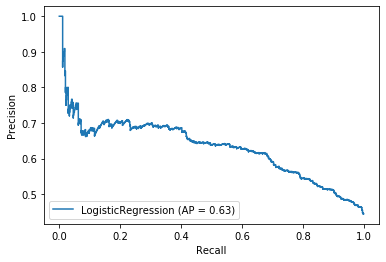

In [35]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(lr, X_test, y_test)

#### This model performed slightly better than out-of-the-box.

### Plotting Feature Importance - Logistic Regression

In [36]:
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(20,20))
    plt.rc('ytick', labelsize=20) 
    plt.rc('xtick', labelsize=20)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.rc('axes', titlesize=20)     # fontsize of the axes title
    plt.rc('axes', labelsize=20)   # fontsize of the x and y labels
    plt.title('Feature Importances for Tuned Logistic Regression Model')
    plt.xlabel('Size of Coefficient')
    plt.ylabel('Name of Feature')
    plt.show()

In [37]:
lr = LogisticRegression(C=0.1, penalty='l2', solver='liblinear')
model_res = lr.fit(X_train_res, y_train_res)
y_predict_lr_res =  model_res.predict(X_test)

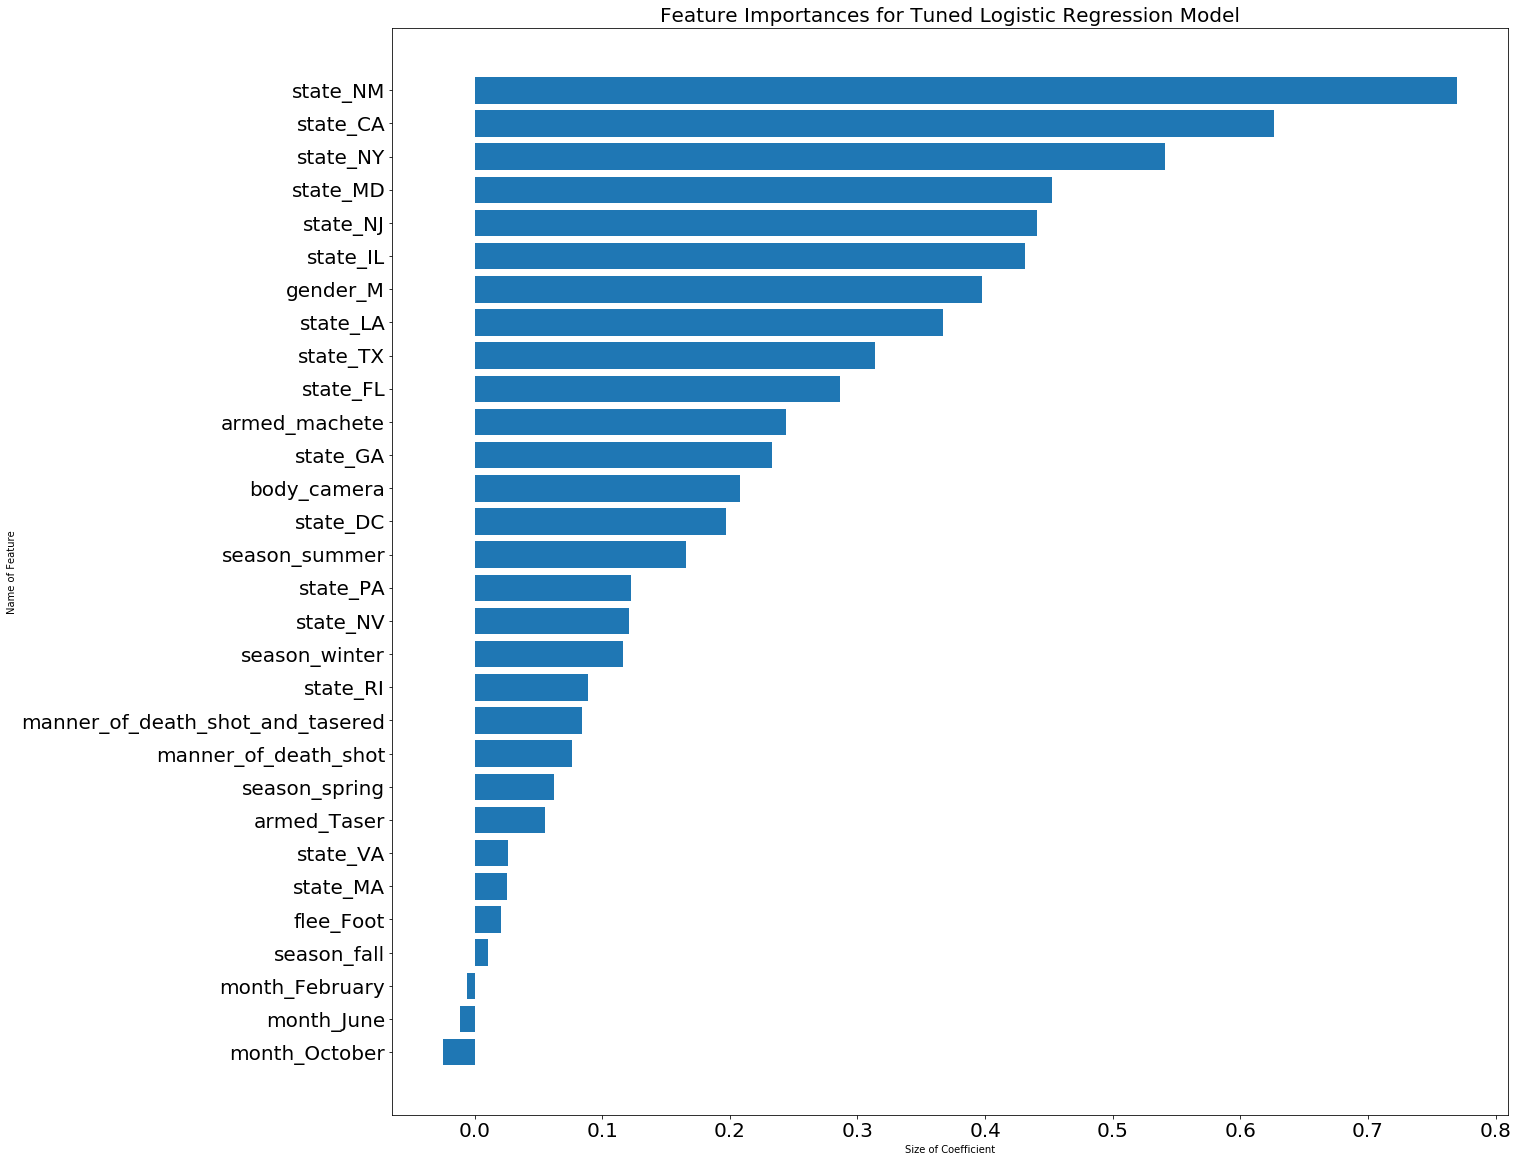

In [38]:
feature_names = X_test.columns[lr.coef_.argsort()[0, -30:]]
importances = np.sort(lr.coef_)[0, -30:]
f_importances(importances, feature_names)

The "season" features are all present here which doesn't seem very relevant, but the states listed are interesting.

There's a lot of features here so I want to try some regularization to see if I can visualize better than the feature importances.

### Doing L1 Regularization to Reduce the Number of Features

CV_training_f1: 0.6548415743407293
F1 Test Score: 0.6238377007607777


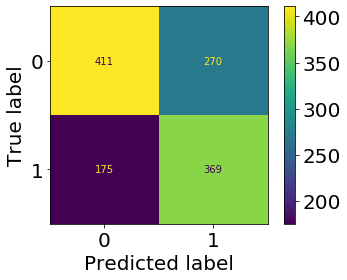

In [39]:
lr = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=1)
lr.fit(X_train_res, y_train_res)
y_predict_lr_res =  lr.predict(X_test)

f1_reg = f1_score(y_test, y_predict_lr_res)


cv_scores_train= cross_val_score(lr,X_train_res,y_train_res,cv=5,scoring='f1')
print('CV_training_f1:', cv_scores_train.mean())
print('F1 Test Score:', f1_reg)
plot_confusion_matrix(lr, X_test, y_test)

This model was worse than out of the box, but the features are easier to read:

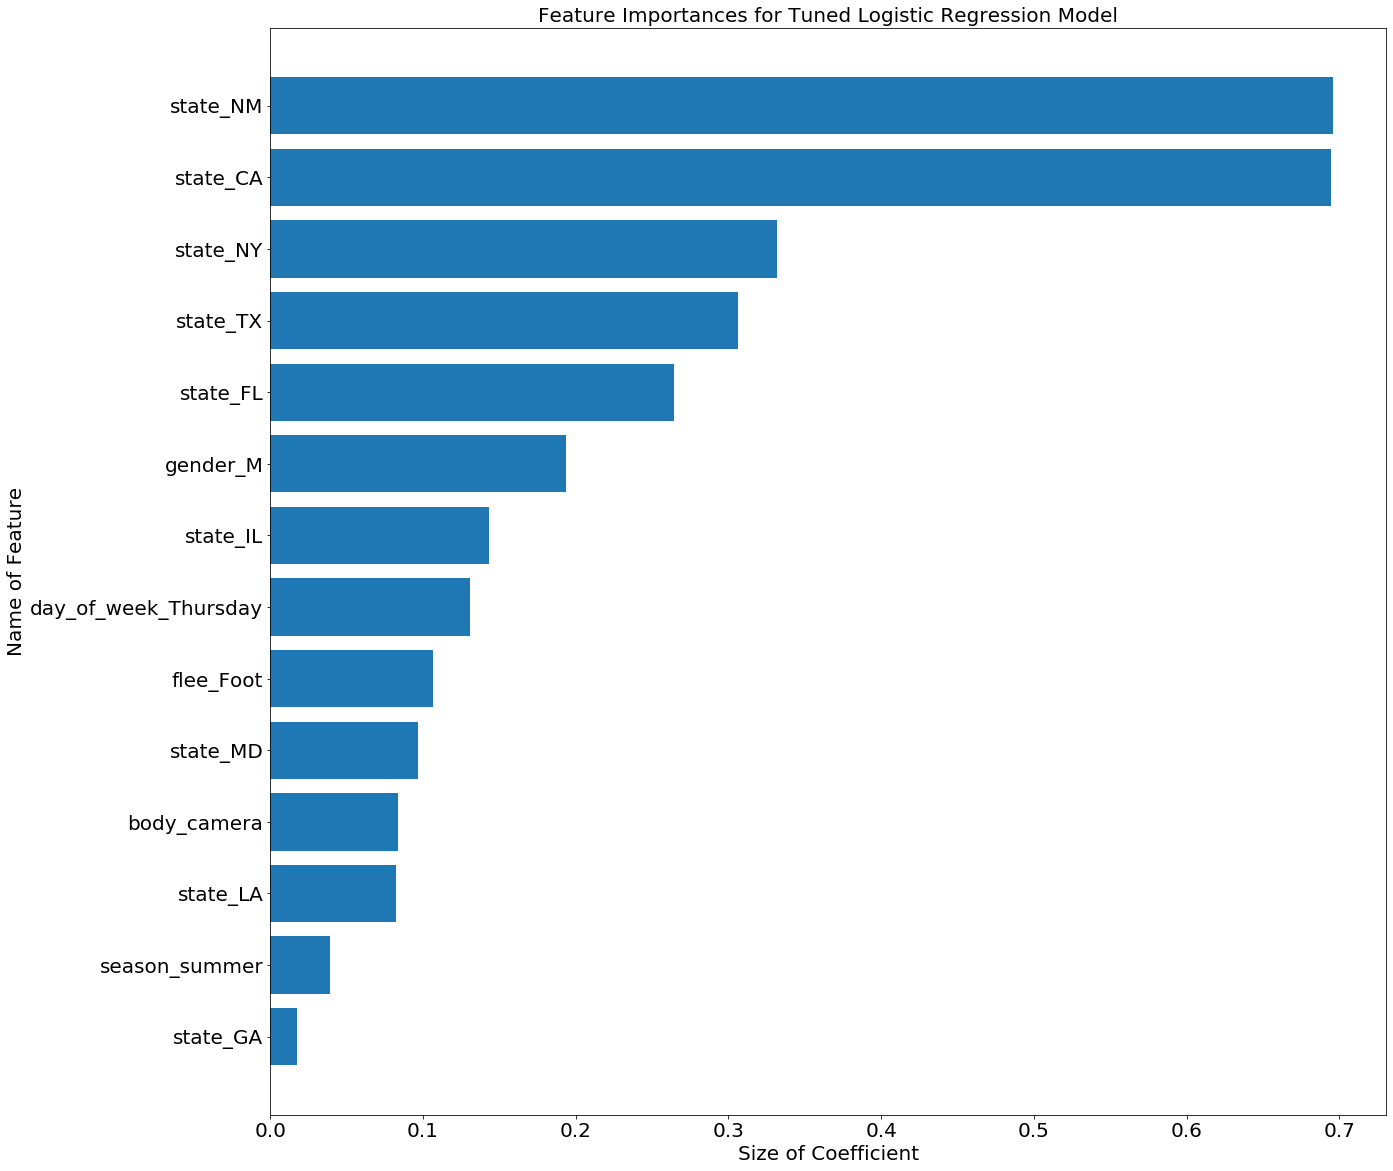

In [40]:
feature_names = X_test.columns[lr.coef_[0,:]>0]
importances = lr.coef_[lr.coef_>0]
f_importances(importances, feature_names)

Even though the model performed worse than the out-of-the-box model, this is much neater and easier to convey. 

Also the features are very similar to the previous plot of feature importances, so even though the model isn't as accurate, this barplot is more readable than the previous one.

Hyperparameter tuning has not done much to increase the F1 Score given by the model on the test data, but it may prove useful for feature extraction, especially after comparing the features it highlights to the features highlighted by the SVC, GBC, and Random Forest models.

#### Logistic Regression Summary:

In [41]:
print('Out of the box F1 score:', f1_lr)
print('F1 score after hyperparameter tuning:', f1_tuned)
print('F1 score after oversampling training data and tuning again:', f1_resampled)
print('F1 score after doing L1 regularization for feature selection:', f1_reg)

Out of the box F1 score: 0.6375227686703097
F1 score after hyperparameter tuning: 0.6342342342342343
F1 score after oversampling training data and tuning again: 0.6451612903225806
F1 score after doing L1 regularization for feature selection: 0.6238377007607777


# Gradient Boost Classifier: Hyperparameter Tuning

#### Visualizing the effects of hyperparameters on out-of-the-box model performance

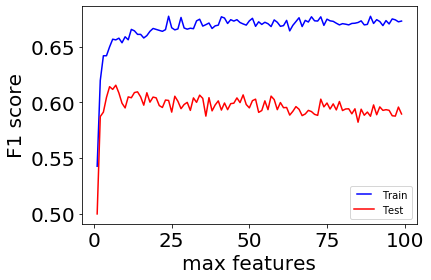

In [42]:
x_train = X_train
x_test = X_test
max_features = list(range(1,100))
train_results = []
test_results = []
for max_feature in max_features:
    model = GradientBoostingClassifier(max_features=max_feature)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred)
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label='Train')
line2, = plt.plot(max_features, test_results, 'r', label='Test')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max features')
plt.show()


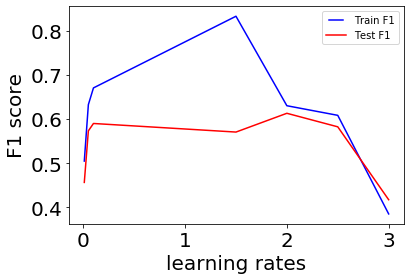

In [43]:
x_train = X_train
x_test = X_test
learn_rates = [0.01, 0.05, 0.1, 1.5, 2.0, 2.5, 3.0]
train_results = []
test_results = []
for learn_rate in learn_rates:
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred)
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learn_rates, train_results, 'b', label='Train F1')
line2, = plt.plot(learn_rates, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('learning rates')
plt.show()


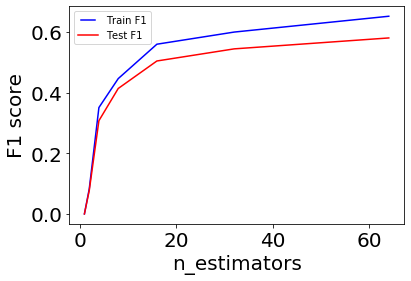

In [44]:
x_train = X_train
x_test = X_test
n_estimators = [1, 2, 4, 8, 16, 32, 64]
train_results = []
test_results = []
for n_estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=n_estimator)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred)
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label='Train F1')
line2, = plt.plot(n_estimators, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('n_estimators')
plt.show()


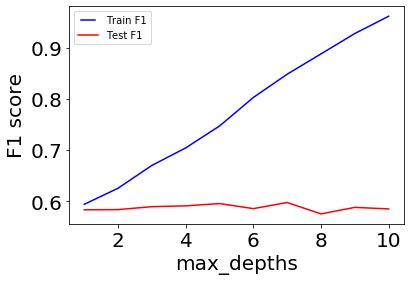

In [45]:
max_depths = np.linspace(1, 10, 10, endpoint=True)

x_train = X_train
x_test = X_test
train_results = []
test_results = []
for max_depth in max_depths:
    model = GradientBoostingClassifier(max_depth=max_depth)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    f1 = f1_score(y_train, train_pred)
    train_results.append(f1)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    test_results.append(f1)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train F1')
line2, = plt.plot(max_depths, test_results, 'r', label='Test F1')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1 score')
plt.xlabel('max_depths')
plt.show()


### Hyperparameter Tuning for Gradient Boost Classifier, using information from above plots to determine ranges 

In [301]:
from timeit import default_timer as timer

start = timer()
model = GradientBoostingClassifier()
max_depth = [2,4,6,8,10]
n_estimators = [15, 40, 60, 80, 100]
learning_rate = [0.1, 0.5, 1, 1.5, 2, 2.5, 3]
max_features= [2, 4, 6, 8, 10]
grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate= learning_rate, max_features=max_features)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


end = timer()
print(end - start)

Best: 0.640653 using {'learning_rate': 0.5, 'max_depth': 2, 'max_features': 10, 'n_estimators': 100}
2064.5481194880267


#### Best 10 Scores

In [302]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

scores=[]
parameters=[]

for mean, stdev, param in zip(means, stds, params):
    scores.append(mean)
    parameters.append(param)
    
scores= np.array(scores)
params=np.array(params)

ps = params[scores.argsort()[-10:]]
ss = scores[scores.argsort()[-10:]]


print('Top 10 Scores, Ascending:')
for p, s in zip(ps, ss):
    print(s, ':', p)

Top 10 Scores, Ascending:
0.6332825116156444 : {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 6, 'n_estimators': 100}
0.633468603787773 : {'learning_rate': 0.5, 'max_depth': 2, 'max_features': 10, 'n_estimators': 40}
0.6336092364547705 : {'learning_rate': 1, 'max_depth': 2, 'max_features': 4, 'n_estimators': 60}
0.6352429198104282 : {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 8, 'n_estimators': 100}
0.6357332358541263 : {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 10, 'n_estimators': 100}
0.6362649778733293 : {'learning_rate': 0.5, 'max_depth': 2, 'max_features': 4, 'n_estimators': 80}
0.6365642120088536 : {'learning_rate': 0.5, 'max_depth': 2, 'max_features': 8, 'n_estimators': 100}
0.6369472854322521 : {'learning_rate': 0.5, 'max_depth': 2, 'max_features': 6, 'n_estimators': 100}
0.6383524876403726 : {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 4, 'n_estimators': 100}
0.6406533540674546 : {'learning_rate': 0.5, 'max_depth': 2, 'max_features': 10

### Using hyperparameters from above to model on test data.

F1: 0.61044912923923


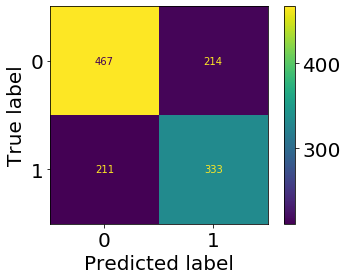

In [46]:
#Best: 0.646013 using {'learning_rate': 0.25, 'max_depth': 4, 'max_features': 4, 'n_estimators': 100}
gbc = GradientBoostingClassifier(learning_rate=0.25, max_depth=4, max_features=4, n_estimators=100, random_state=2)
gbc.fit(X_train, y_train)
y_predict_gbc = gbc.predict(X_test)
f1gbc_tuned= (f1_score(y_test, y_predict_gbc))
print('F1:', f1gbc_tuned)
plot_confusion_matrix(gbc, X_test, y_test)

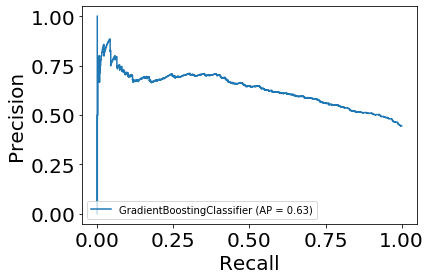

In [47]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(gbc, X_test, y_test)

This precision recall curve is very odd. It would be 'good' except for the huge dip at the beginning of the curve.

### GridSearchCV using Resampled Data for GBC

In [305]:
from timeit import default_timer as timer

start = timer()

model = GradientBoostingClassifier()
max_depth = [2,4,6,8,10]
n_estimators = [15, 40, 60, 80, 100]
learning_rate = [0.1, 0.15, 0.2, 0.25, 0.3]
max_features= [2, 6, 10, 12, 16, 18, 22]
grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate= learning_rate, max_features=max_features)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='f1')
grid_result = grid_search.fit(X_train_res, y_train_res)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

end = timer()
print(end - start)

Best: 0.697618 using {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 10, 'n_estimators': 40}
2125.9687671860156


In [306]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

scores=[]
parameters=[]

for mean, stdev, param in zip(means, stds, params):
    scores.append(mean)
    parameters.append(param)
    
scores= np.array(scores)
params=np.array(params)

ps = params[scores.argsort()[-10:]]
ss = scores[scores.argsort()[-10:]]

for p, s in zip(ps, ss):
    print(s, ':', p)

0.6931716106016707 : {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 18, 'n_estimators': 100}
0.693604013226809 : {'learning_rate': 0.15, 'max_depth': 4, 'max_features': 16, 'n_estimators': 80}
0.6940197049724737 : {'learning_rate': 0.25, 'max_depth': 4, 'max_features': 6, 'n_estimators': 80}
0.6948156076595993 : {'learning_rate': 0.2, 'max_depth': 4, 'max_features': 2, 'n_estimators': 100}
0.6956140171829862 : {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 18, 'n_estimators': 80}
0.6956248399954295 : {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 6, 'n_estimators': 40}
0.6956596178656017 : {'learning_rate': 0.15, 'max_depth': 4, 'max_features': 2, 'n_estimators': 100}
0.6965004951663033 : {'learning_rate': 0.25, 'max_depth': 4, 'max_features': 12, 'n_estimators': 80}
0.6974191621421089 : {'learning_rate': 0.1, 'max_depth': 6, 'max_features': 6, 'n_estimators': 100}
0.6976176188755753 : {'learning_rate': 0.1, 'max_depth': 10, 'max_features': 10, 'n_estimators': 4

### Using hyperparameters from GridSearch to model on test data 

F1 Score: 0.6480263157894737


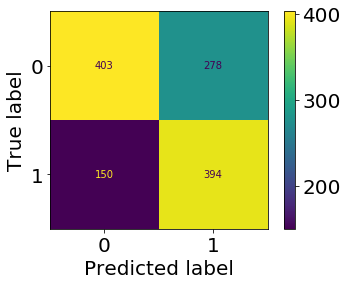

In [48]:
#tried Best params: 0.695688 using {'learning_rate': 0.1, 'max_depth': 8, 'max_features': 6, 'n_estimators': 60}
#second best does best
gbc = GradientBoostingClassifier(learning_rate=0.3, max_depth=4, max_features=6, n_estimators=40, random_state=1)
gbc.fit(X_train_res, y_train_res)
y_predict_gbc = gbc.predict(X_test)
f1gbc_resampled = (f1_score(y_test, y_predict_gbc))
print('F1 Score:', f1gbc_resampled)
plot_confusion_matrix(gbc, X_test, y_test)

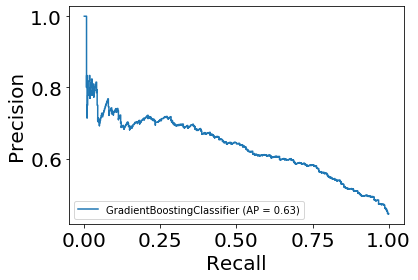

In [49]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(gbc, X_test, y_test)

This is better than the Logistic Regression results. 

#### Plotting Feature Importances Gradient Boost Resampled

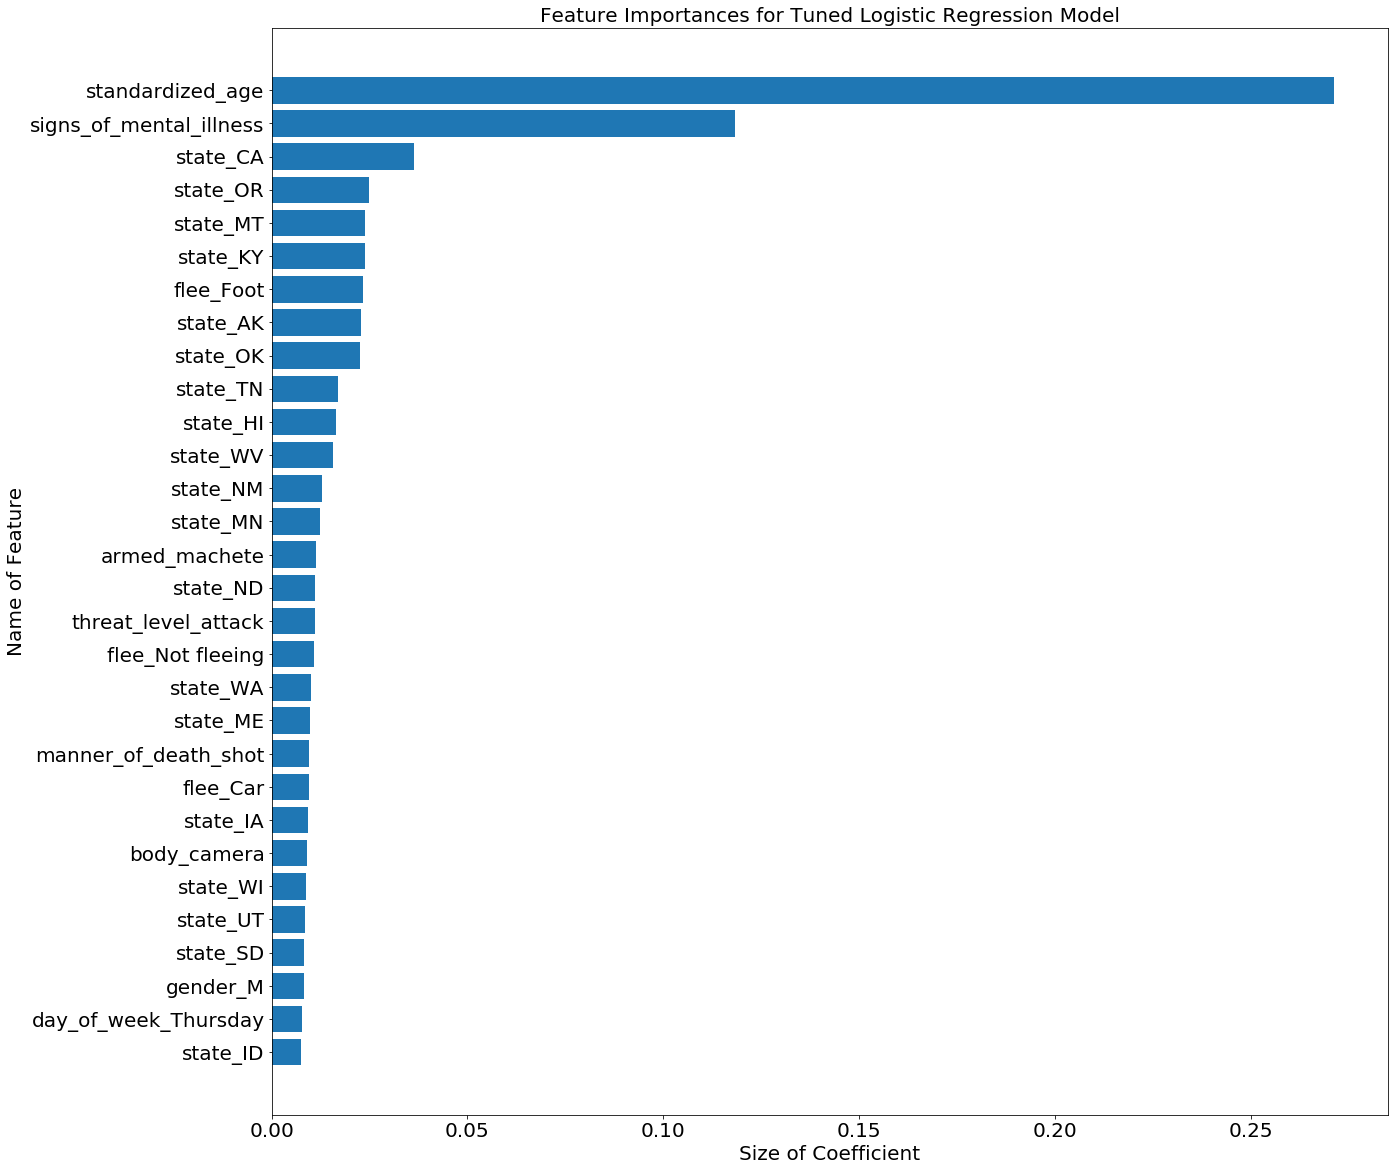

In [50]:
feature_names = X_train.columns[gbc.feature_importances_.argsort()[-30:]]
importances = gbc.feature_importances_[gbc.feature_importances_.argsort()][-30:]
f_importances(importances, feature_names)

These features are quite different from the LR features. I'm dubious of the inclusion of MT here because Montana does not any Black fatalities at all. Does that negate the importance the other features listed? Also this plot includes a lot of features all with short bars and a few that seem more significant. I would not say it translates well into communicating feature effects with a lay audience, especially given the presence of some features that seem counter-intuitive (e.g. 'state_MT').

Here, the inverse is true of what I found for the Logistic Regression model: GBC performs better but doesn't not translate well into insight on feature importances, neither in readability nor in conforming to common sense understanding of some of the features. 

#### GBC Summary:

In [51]:
print('F1 Score of out-of-the-box model: 0.598901')
print('F1 score of first tuned model:', f1gbc_tuned)
print('F1 score of retuned model using oversampled training data:',f1gbc_resampled)

F1 Score of out-of-the-box model: 0.598901
F1 score of first tuned model: 0.61044912923923
F1 score of retuned model using oversampled training data: 0.6480263157894737


In [52]:
models = ['gbc', 'lr', 'svc', 'rf']
outbox = [f1_gbc, f1_lr, f1_svm, f1_rf]
firsttuned = [f1gbc_tuned, f1_tuned, np.nan, np.nan]
oversampled = [f1gbc_resampled, f1_resampled, np.nan, np.nan]
oversampled_and_reg = [np.nan, f1_reg, np.nan, np.nan]


df = pd.DataFrame(list(zip(models, outbox, firsttuned, oversampled, oversampled_and_reg)),
                 columns = ['Model', 'Out of the Box F1', 'First Tuned F1', 'Oversampled F1', 'Oversampled and Regularized F1'])
df.to_csv('summary_gbc_lr.csv')

### Summary All Models (SVC and RF in separate notebook) 

In [54]:
df2 = pd.read_csv('summary_all_models.csv', index_col=0)
df2.sort_values('Oversampled F1', ascending=False)

,Model,Out of the Box F1,First Tuned F1,Regularized F1,Oversampled F1,Oversampled and Regularized F1
0,gbc,0.598901,0.610449,NaN,0.648026,NaN
1,lr,0.637523,0.634234,NaN,0.645161,0.623838
2,svc,0.637343,0.652927,0.650502,0.633452,0.640960
3,rf,0.568684,0.634310,NaN,0.633081,NaN


### Best Models

In [55]:
import pandas as pd
models = ['svm','svm','logistic regression']
oversampled = ['no','no','yes']
hyperparameters = ["{'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}",
                  "{'C': .1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}",
                  "{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}"]
scores = [0.652927,0.650502,0.645161]
best = pd.DataFrame(list(zip(models, oversampled,hyperparameters,scores)),
                   columns = ['Model','Oversampled?', 'Hyperparameters','Scores'])
pd.options.display.max_colwidth = 100
best.to_csv('Model_Metrics.csv')
best

,Model,Oversampled?,Hyperparameters,Scores
0,svm,no,"{'C': 10, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}",0.652927
1,svm,no,"{'C': .1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}",0.650502
2,logistic regression,yes,"{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}",0.645161


After hyperparameter tuning, the differences of the model performances mostly diminished with Logistic Regression and Support Vector Machines generally doing marginally better at predicting whether a person killed was Black or Hispanic. 

Despite small differences in model performance, the features highlighted by the Tree-based models versus the Linear models differed significantly. Based on prior knowledge, I would give preference to the linear models' feature importances over those of the tree-based models (e.g. although Montana featured highly in the tree-based models, no Black or Hispanic people were killed in Montana; additionally every single day of the week and every season featured highly in the tree based models). The SVC and LR barplots are also much easier to read and convey to a lay audience, lending themselves to a story that the tree-based barplots do not. 

While none of these models performed impressively nor saw much change after hyperparameter tuning, I can deduce from the features highlighted that more research can be done to investigate the particular features of the state (e.g. its racial diversity, crime rates, population density, laws pertaining to police use of force) that may lend themselves to higher numbers of Black or Hispanic fatal victims at the hands of police.